<a href="https://colab.research.google.com/github/leul12/Data_Exploration/blob/main/tweet_stalking_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import itertools
from datetime import datetime
import datetime
import time
from pandas.io.json import json_normalize
import json
from tqdm.notebook import tqdm_notebook
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

## Let's Check the version 🐍

In [ ]:
from platform import python_version
print(python_version())

3.8.16


## Okay now we can do our **job**

1.   Let's install the 🔨
2.   Extract the 🗄️
3.   And So on



# ⬆️ install the tool 🔨

In [ ]:
pip install git+https://github.com/JustAnotherArchivist/snscrape.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-qdkf_0yp
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-qdkf_0yp
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit cbdaee6864aa8d3e9e4326d4fe224a517aabbc2c
  Preparing metadata (setup.py) ... done


## 🤔   **how to extract the tweets ?** no worries ⬇️

In [ ]:
import snscrape.modules.twitter as sntwitter

# okay now some magic to get the actual 🐦 using the **itertools** 😉

In [ ]:
df = pd.DataFrame(itertools.islice(
    sntwitter.TwitterSearchScraper('#vaccine').get_items(), 30000))
# let's Test what kind of data we can get from it (if it works)
df.head(2)

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card
0,https://twitter.com/Healthcare_GD/status/16113...,2023-01-06 12:21:03+00:00,Monoclonal antibodies have been dominating Alz...,Monoclonal antibodies have been dominating Alz...,1611337044759908352,"{'username': 'Healthcare_GD', 'id': 113373418,...",0,0,0,0,...,None,None,NaN,None,None,None,None,"[Alzheimers, vaccine, mAbs]",None,None
1,https://twitter.com/Newsfilter2/status/1611336...,2023-01-06 12:18:01+00:00,The #WEF just can't wait to rewrite your #DNA ...,The #WEF just can't wait to rewrite your #DNA ...,1611336280620539904,"{'username': 'Newsfilter2', 'id': 105474057648...",0,0,0,0,...,None,None,NaN,None,None,None,None,"[WEF, DNA, mRNA, StoptheShotsNow, vaccine, Gen...",None,None


# okay Now that we got this out of the way what now 🤔


*   we check data heads
*   clean some columns [user , hastags , date , mentionedUsers & inReplyToUser ]
*   and take it form there 
*   🚶‍♂️



In [ ]:
dfuser= pd.json_normalize(df['user'])
dfuser.head(2)

,username,id,displayname,rawDescription,renderedDescription,descriptionLinks,verified,created,followersCount,friendsCount,...,label,link.text,link.url,link.tcourl,link.indices,link,label.description,label.url,label.badgeUrl,label.longDescription
0,Healthcare_GD,113373418,GlobalData Healthcare,We have decades of experience working as an in...,We have decades of experience working as an in...,None,False,2010-02-11 15:09:21+00:00,2644,1339,...,NaN,globaldata.com/industries-we-…,https://www.globaldata.com/industries-we-cover/,https://t.co/2kUafMawAY,"(0, 23)",NaN,NaN,NaN,NaN,NaN
1,Newsfilter2,1054740576485236736,Vidmax.com,#Conservative #Freedom #StopTheShots #FauciLie...,#Conservative #Freedom #StopTheShots #FauciLie...,None,False,2018-10-23 14:25:24+00:00,1443,62,...,NaN,vidmax.com,https://vidmax.com/,https://t.co/cfcuKPB0AN,"(0, 23)",NaN,NaN,NaN,NaN,NaN


# NOw Let's Take what we need and add the to the main Data Frame ⚙️

In [ ]:
dfuser.drop(['id','displayname','rawDescription','renderedDescription','descriptionLinks','location','statusesCount','favouritesCount','listedCount',
                  'mediaCount','link','profileImageUrl','profileBannerUrl','label','link.text','link.url','link.tcourl','link.indices'], axis = 1, inplace = True)
dfuser.head(2)

,username,verified,created,followersCount,friendsCount,protected,label.description,label.url,label.badgeUrl,label.longDescription
0,Healthcare_GD,False,2010-02-11 15:09:21+00:00,2644,1339,False,NaN,NaN,NaN,NaN
1,Newsfilter2,False,2018-10-23 14:25:24+00:00,1443,62,False,NaN,NaN,NaN,NaN


# now that we 🫧 the 🧫  time to add it to the clean data sets

In [ ]:
df2=df.drop(['user','renderedContent','sourceUrl','hashtags','cashtags','card','inReplyToTweetId','inReplyToUser','mentionedUsers','coordinates','links','media','retweetedTweet','quotedTweet','place'],axis=1)
df2.head(2)

,url,date,rawContent,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceLabel
0,https://twitter.com/Healthcare_GD/status/16113...,2023-01-06 12:21:03+00:00,Monoclonal antibodies have been dominating Alz...,1611337044759908352,0,0,0,0,1611337044759908352,en,"<a href=""https://www.oktopost.com"" rel=""nofoll...",Oktopost
1,https://twitter.com/Newsfilter2/status/1611336...,2023-01-06 12:18:01+00:00,The #WEF just can't wait to rewrite your #DNA ...,1611336280620539904,0,0,0,0,1611336280620539904,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App


In [ ]:
result = pd.concat([df2, dfuser], axis=1)
result.reset_index(drop=True)
result.head(2)

,url,date,rawContent,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,...,username,verified,created,followersCount,friendsCount,protected,label.description,label.url,label.badgeUrl,label.longDescription
0,https://twitter.com/Healthcare_GD/status/16113...,2023-01-06 12:21:03+00:00,Monoclonal antibodies have been dominating Alz...,1611337044759908352,0,0,0,0,1611337044759908352,en,...,Healthcare_GD,False,2010-02-11 15:09:21+00:00,2644,1339,False,NaN,NaN,NaN,NaN
1,https://twitter.com/Newsfilter2/status/1611336...,2023-01-06 12:18:01+00:00,The #WEF just can't wait to rewrite your #DNA ...,1611336280620539904,0,0,0,0,1611336280620539904,en,...,Newsfilter2,False,2018-10-23 14:25:24+00:00,1443,62,False,NaN,NaN,NaN,NaN


# let's make the date column the first column ⛹

In [ ]:
def swap_columns(result, col1, col2):
    col_list = list(result.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    result = result[col_list]
    return result
res = swap_columns(result,'url','date')

# ⏱️ manuplation

In [ ]:
res.sort_values('date')
res.head(2)

,date,url,rawContent,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,...,username,verified,created,followersCount,friendsCount,protected,label.description,label.url,label.badgeUrl,label.longDescription
0,2023-01-06 12:21:03+00:00,https://twitter.com/Healthcare_GD/status/16113...,Monoclonal antibodies have been dominating Alz...,1611337044759908352,0,0,0,0,1611337044759908352,en,...,Healthcare_GD,False,2010-02-11 15:09:21+00:00,2644,1339,False,NaN,NaN,NaN,NaN
1,2023-01-06 12:18:01+00:00,https://twitter.com/Newsfilter2/status/1611336...,The #WEF just can't wait to rewrite your #DNA ...,1611336280620539904,0,0,0,0,1611336280620539904,en,...,Newsfilter2,False,2018-10-23 14:25:24+00:00,1443,62,False,NaN,NaN,NaN,NaN


## date 🔪 into month week hour and so on and drop the old column "date" **💂**

In [ ]:
res['date'] = pd.to_datetime(res['date'])
datetime_col = ['date']
def extract_date_info(df, col,):
    for feat in col:
        res[feat +'_day'] = res[feat].dt.day
        res[feat +'_month'] = res[feat].dt.month
        res[feat+'_WeekDay'] = res[feat].dt.weekday
        res[feat+'_Quarter'] = res[feat].dt.quarter
        res[feat+'_year'] = res[feat].dt.year
        res['Tweet time'] = res[feat].dt.time
        res['monthname'] = res[feat].dt.month_name()
        res['dayname'] = res[feat].dt.day_name()
    res.drop(columns=col,axis=1,inplace=True)

extract_date_info(res, datetime_col) 

In [ ]:
res.to_csv('vaccine.csv',index=False)

### okay now to the 🖼️ part



1.    **what are people using when tweeting** 🤔




In [ ]:
dfpie= res.groupby('sourceLabel').count()
dfpie

,url,rawContent,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,...,label.badgeUrl,label.longDescription,date_day,date_month,date_WeekDay,date_Quarter,date_year,Tweet time,monthname,dayname
sourceLabel,,,,,,,,,,,,,,,,,,,,,
15 Minute Fun,2,2,2,2,2,2,2,2,2,2,...,0,0,2,2,2,2,2,2,2,2
@healthpolicyw,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
AIT News,3,3,3,3,3,3,3,3,3,3,...,0,0,3,3,3,3,3,3,3,3
ANews Twitter,2,2,2,2,2,2,2,2,2,2,...,0,0,2,2,2,2,2,2,2,2
Adobe Express,19,19,19,19,19,19,19,19,19,19,...,0,0,19,19,19,19,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tstga,2,2,2,2,2,2,2,2,2,2,...,0,0,2,2,2,2,2,2,2,2
twittbot.net,6,6,6,6,6,6,6,6,6,6,...,0,0,6,6,6,6,6,6,6,6
yorkshire-times,18,18,18,18,18,18,18,18,18,18,...,0,0,18,18,18,18,18,18,18,18


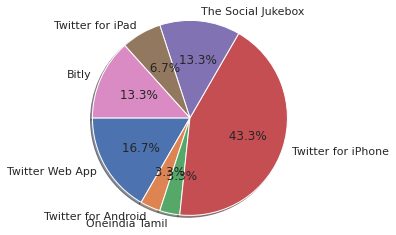

In [ ]:
labels = pd.unique(res['sourceLabel'])
sizes = dfpie['id']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%5.1f%%',shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


2.   okay now that we know what platform people use to tweet we can go deeper and find out the tweet let's say that used "Twitter for iphone" 🤓

